# Bias and Variance

- __Prerequisites__: [Gradient based optimisation](), basic statistics

This notebook will introduce some core concepts in machine learning:
- bias
- variance
- underfitting
- overfitting
- generalisation

## Introduction

> One of the steps in the ML system design process involves verifying the performance of the model on both the training and validation datasets. This process is called **generalisation**. 

If the model does not perform well on the training data, it is likely to be underfitting. If the model, however, performs well on the training data, but poorly on the validation data, it is likely to be overfitting.

## Bias and Underfitting

When we train models, we must ensure that they are appropriately optimised.

> A __bias__ problem occurs when the model is overly simple and its function cannot model the data.

The best example is __attempting to fit a curve with a straight line (linear regression model)__. Although we may succeed in approximating for a few points, overall, it cannot be achieved. Consider the example below:

X: [ 2.3877551   0.79591837 -1.89795918] 

Y: [ 40.84045763   1.51260954 -20.51076507] 

[[ 2.3877551 ]
 [ 0.79591837]
 [-1.89795918]]


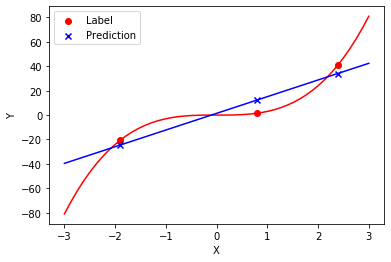

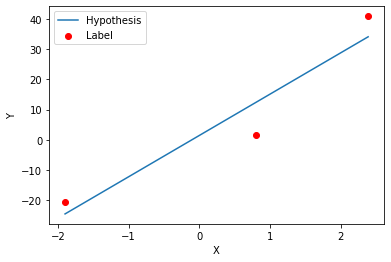

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial

class MultiVariableLinearHypothesis:
    def __init__(self, n_features):
        self.n_features = n_features
        self.b = np.random.randn()
        self.w = np.random.randn(n_features) # initialise vector of features

    def __call__(self, X): #input is of shape (n_datapoints, n_vars)
        y_hat = np.matmul(X, self.w) + self.b # make a linear prediction (weighted sum of features plus bias)
        return y_hat #output is of shape (n_datapoints, 1)
    
    def update_params(self, new_w, new_b):
        self.w = new_w # 
        self.b = new_b
    
    def calc_deriv(self, X, y_hat, labels):
        diffs = y_hat - labels # compute error
        dLdw = 2 * np.array([np.sum(diffs * X[:, i]) / m for i in range(self.n_features)]) # compute rate of change of loss wrt w 
        dLdb = 2 * np.sum(diffs)/m # compute the rate of change in the loss w.r.t b
        return dLdw, dLdb
                           
def train(num_epochs, X, Y, H):
    for e in range(num_epochs): # for this many complete runs through the dataset
        y_hat = H(X) # make predictions
        dLdw, dLdb = H.calc_deriv(X, y_hat, Y) # calculate the gradient of the current loss with respect to the model parameters
        new_w = H.w - learning_rate * dLdw # compute the new model weight using the gradient descent update rule
        new_b = H.b - learning_rate * dLdb # compute the new model bias using the gradient descent update rule
        H.update_params(new_w, new_b) # update the model weight and bias
                           
def create_polynomial_inputs(X, order=3):
    new_dataset = np.array([X, *[np.power(X, i) for i in range(2, order + 1)]]).T # add other powers of x as features in our dataset
    return new_dataset # new_dataset should be shape [m, order]
            
_range = 3
data = np.linspace(-_range, _range, 50) # input domain is 50 points from -range to +range

m = 3 # how many examples do we want?
X = np.random.choice(data, size=(m,)) # randomly sample from our dataset
true_coeffs = (0, 0, 0, 3) # true coefficients of the function which we will sample from
Y_fn = np.polynomial.polynomial.Polynomial(true_coeffs) # returns a callable function which will evaluate the polynomial at the argument provided
Y = Y_fn(X) # compute ground truth outputs for the function evaluated at X
print('X:',X, '\n')
print('Y:',Y, '\n')   

num_epochs = 1000
learning_rate = 0.01
highest_order_power = 1

x_data = create_polynomial_inputs(X, highest_order_power) # create polynomial features of the data 
print(x_data)
H = MultiVariableLinearHypothesis(n_features=highest_order_power) # initialise our model
    
train(num_epochs, x_data, Y, H) # train model and plot cost curve

fig = plt.figure()
plt.scatter(X, Y, c='r', label='Label') # scatter plot the true labels 
plt.plot(data, Y_fn(data), c='r') # plot the true function
plt.scatter(X, H(x_data), c='b', label='Prediction', marker='x') # scatter plot the predictions
plt.plot(data, H(data.reshape(len(data), 1)), c='b') # plot hypothesis
plt.legend() # add plot legend
plt.xlabel('X') # give y axis label
plt.ylabel('Y') # give y axis label
plt.show() # show the plot

In this case, our model is biased towards modelling a linear function; however, in reality, the true function is curved, not linear.



### Bias definition



> Bias refers to the expected difference between the parameters that we learn and the true parameters that define the data-generating function.

<p align=center><img width=1000 src=images/NN1_bias.JPG></p>



### Underfitting: the shortcoming of bias


Biased models do not perform optimisation appropriately. Even their best parameterisation based on the objective will be suboptimal. Bias results when a model does not have a high-enough capacity to represent the necessary function.

### Symptoms of bias



- Model training loss plateaus.
- Stagnation of test performance with increased training.

<p align=center><img width=900 src=images/bias-syms.jpg></p>



### Solutions to bias



- Use a model with a significantly high capacity.
- Change the objective function.



### Visualising bias



In actuality, there is no way to know the parameters of the data-generating function. However, in this case, we know the parameters since we defined the function; therefore, we can quantitatively calculate the bias as an example.

<p align=center><img width=900 src=images/computing-bias.jpg></p>

To demonstrate, we run the code cell below to compute the bias of our model (recall that this is only possible because we created the fake data and know its true parameterisation).

In [9]:
params = np.array([np.append(H.b, H.w)])

def compute_bias(my_params, true_params):
    """Compares your model's parameter vector with the data-generating parameter vector, and computes the bias in the model."""
    
    # MAKE PARAM VECTORS THE SAME LENGTH SO THAT THE MATH WORKS
    if my_params.shape[1] < len(true_params): # if this model does not have as many params as the true model
        my_params = np.append(my_params, np.zeros((my_params.shape[0], len(true_params) - my_params.shape[1])), axis=1) # pad it with zeros (this is assuming that the n parameters i have are coefficients of the same features that the first n parameters in the data-generating function multiply)
    elif my_params.shape[1] > len(true_params): # if my model has more params than are in the data generating function
        true_params = np.append(true_params, np.zeros((1, my_params.shape[1] - len(true_params)))) # pad the true params with zeros so the shape matches
    
    # COMPUTE THE BIAS BETWEEN THE PARAM VECTORS
    diffs = my_params - true_params ## compute the difference between the parameter vectors
    bias = np.mean(diffs) ## compute the mean bias
    bias = np.abs(bias) ## we want the absolute values, which tell us whether the model is biased or not, regardless of the direction
    return bias

bias = compute_bias(params, true_coeffs)
print('BIAS:', bias)
    

BIAS: 11.038227977635275


## Variance and Overfitting



Occasionally, we encounter the opposite problem: a high variance. 

In such cases, our model can model significantly more complex functions than necessary. 

> This implies that it can easily fit all the training examples and  that it can achieve this in many ways (the variance of the different acceptable parameterisations is high). 

<p align=center><img width=1000 src=images/NN1_variance.JPG></p>



### Overfitting: the shortcoming of variance



Many of the acceptable parametrisations will not model the desired function and only perform well for the examples on which they were trained (contrarily, our objective is to __achieve good performance on unseen (test) data)__. This means that the variance is inversely proportional to the generalisation, i.e. the higher the variance, the worse the generalisation. 

> Variance results in the __overfitting__ of our models on the data they were trained on.



### Symptom of variance



- Training loss decreases continuously, whereas testing loss increases.

<p align=center><img width=900 src=images/var-syms.jpg></p>



### Solutions to a high variance



- Reduce the capacity of the model.
- Increase the size of the dataset.
- Introduce regularisation into the loss function. We cover regularisation in this [notebook](http://theaicore.com/app/training/regularisation).



### Visualising variance



Once more, in practice, it is very unlikely that we ever know the parameterisation of the data-generating distribution. In this case, we have this information only because we created the function.

The code below trains several models and subsequently plots the function that they represent. As you can observe, each of the functions fits the training examples appropriately, although they are all different. 

This highlights the variance in different acceptable models.

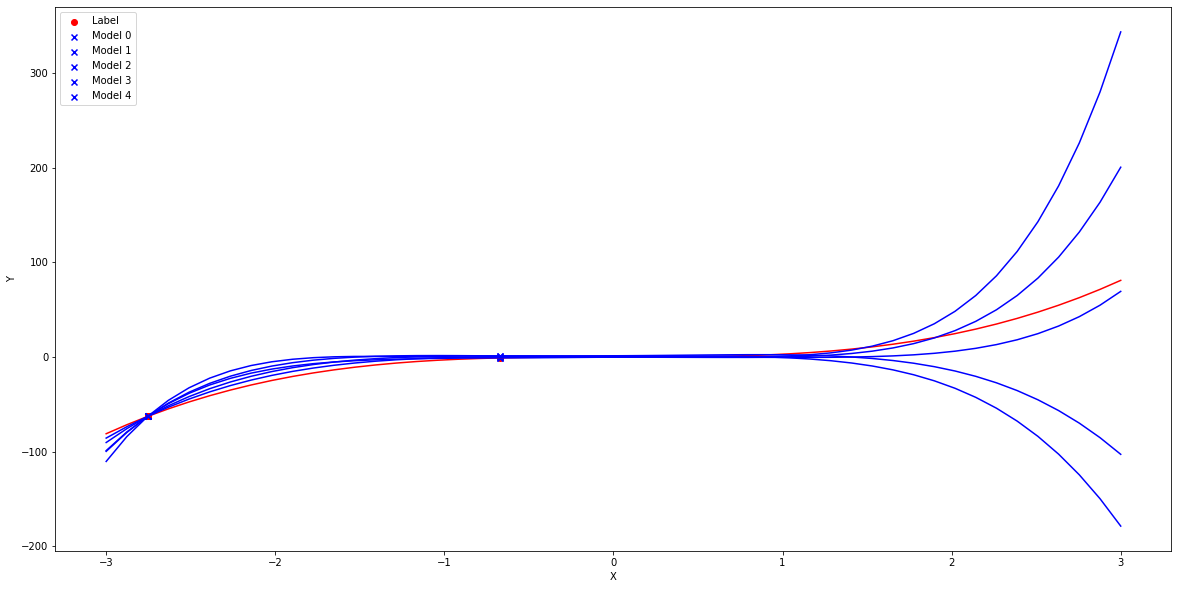

Variance: -2.960594732333751e-17


In [10]:
num_epochs = 10000
learning_rate = 0.000001
highest_order_power = 5

x_poly = create_polynomial_inputs(X, highest_order_power) # create polynomial 

fig = plt.figure(figsize=(20, 10))
plt.scatter(X, Y, c='r', label='Label')
plt.plot(data, Y_fn(data), c='r')
plt.xlabel('X')
plt.ylabel('Y')

colors = ['b', 'g', 'k', 'y']
    
def train_n_models(order, n_models=5, plot=True):
    params = []
    for i in range(n_models): # train this many models
        H = MultiVariableLinearHypothesis(n_features=order) ## initialise our model with num powers of x = order
        train(num_epochs, x_poly, Y, H) ## train model and plot cost curve
        params.append(np.append(H.b, H.w))
        if plot:
            plt.scatter(X, H(x_poly), c='b', label=f'Model {i}', marker='x')
            plt.plot(data, H(create_polynomial_inputs(data, order)), c='b')
    if plot:
        plt.legend()
        plt.show()
    return np.array(params)

def compute_variance(all_params):   
    avg_params  = np.mean(all_params, axis=0) ## compute average resulting parameters
    diffs = all_params - avg_params ## broadcast the subtraction of the avg params
    variance = np.mean(diffs) ## compute the mean squared 
    return variance

params = train_n_models(highest_order_power)
v = compute_variance(params)
print('Variance:', v)

# might need to run the code a few times to show models with a noticeable variance

Evidently, all these functions pass through the datapoints in the training set (indicated by the plotted circles). They fit them almost perfectly. However, they do not actually represent the true input-output relationship; this is particularly evident further away from examples that were observed in the training set.

## Memorisation



At the end of the `variance` spectrum (this conventionally occurs in neural networks, which we will see later) is __memorisation__.

> Memorisation occurs when the model internalises the whole training dataset, essentially pairing the `input` and `output` without learning anything.



### Example



Imagine a case where we have multiclass classification (`10` classes) and `10` examples, each of a different class.

In such a case, our logistic regression model will __perfectly__ fit the training dataset by memorising each example (setting weights exactly how they should be).

> Other examples will likely fail as the model failed to obtain any key characteristic of the examples belonging to said class.

## Bias vs Variance vs Generalisation for Different Models



Bias and variance measure two different sources of error in a model's parameterisation.

- __Bias__ measures the expected error from the true parameterisation.
- __Variance__ measures the expected difference between a particular parameterisation and the average parameterisation. This is a result of the particular subset of all the possible examples that constitute the dataset on which the model was trained.



The image below presents a summary of the differences between bias and variance.



<p align=center><img width=900 src=images/b-v-grid.jpg></p>


### Generalization theory: loss decomposition into bias and variance



$$
L_{MSE} = \mathbb{E}[( \hat{\theta}_m - \theta )^2] = Bias(\hat{\theta}_m)^2 + Var(\hat{\theta}_m)
$$



- The MSE of a parameter estimate can be expressed as the sum of the bias squared and the variance. 
- It is a suitable way to evaluate the optimal capacity of a model. 
- __However,__ knowledge of the true parameterisation of the data-generating function is required to compute the bias and variance. 
- __Although this cannot be carried out in practice,__ it gives us an idea of how it works in actuality.

The code below trains multiple polynomial models including terms for successively larger powers of x. 

For each, we calculate the bias and variance using the true parameterisation of the data-generating function. We will train each of these models several times to obtain an average and plot the MSE:

order:  1
order:  2
order:  3
order:  4
order:  5
order:  6
order:  7
order:  8


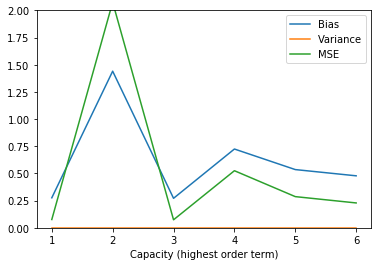

In [11]:
poly_orders = 9
num_models = 5

all_parameters = [] # will use this in the next code cell

orders = list(range(1, poly_orders))
biases = []
variances = []
for order in orders:
    print('order: ', order)
    if order > 1:
        x_poly = create_polynomial_inputs(X, order) # create polynomial 
    else:
        x_poly = X.reshape(-1, 1)
    parameters = train_n_models(order, n_models=num_models, plot=False)
    biases.append(compute_bias(parameters, true_coeffs))
    variances.append(compute_variance(parameters))
    
    all_parameters.append(parameters) # will use this in the next code cell
    
plt.plot(orders, biases, label='Bias')
plt.plot(orders, variances, label='Variance')
plt.plot(orders, np.sum([variances, np.array(biases)**2], axis=0), label='MSE')
plt.xlabel('Capacity (highest order term)')
plt.ylim(0, 2)
plt.legend()
plt.show()

The graph above shows that the model with the minimum MSE in the estimate of the true parameters is that which includes x terms up to $x^3$. This suggests that we use a cubic model, which is reasonable since the data were created from a cubic function.

If we smoothed the above graph, it should appear similar to that shown below.

<p align=center><img width=900 src=images/g-gap.jpg></p>

*Things to note*
- We build ML algorithms to make predictions. Real success in ML is measured by the ability of a model to make correct predictions on unseen samples.
- We already know that models with high bias or high variance are not good because they either underfit or overfit the data. Thus, they will not **generalise** to perform well on new examples (they have a high **generalisation error**).
- Since the MSE incorporates both the bias and variance, it should be a measure of the generalisation error.

Now, we add to the above code to not only train the models but also to compute their generalisation capability.

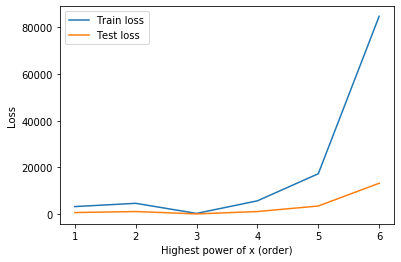

In [12]:
def Loss(y_hat, y):
    return np.sum((y_hat - y)**2) / len(y_hat)

def train_and_test(params_list):
    train_data = np.random.choice(data, size=(3,)) # randomly sample from data
    test_data = np.random.choice(data, size=(100,))
    train_losses = []
    test_losses = []

    for order, params in enumerate(params_list): # for each of the previously trained parameters

        # params = np.mean(params, axis=0) # compute the mean of the parameters predicted for this model
        params = params[0] # or simply use the first one

        h = np.polynomial.polynomial.Polynomial(params) # create a polynomial function

        h_train = h(train_data) # make predictions on the training data
        train_loss = Loss(h_train, Y_fn(train_data)) # compute the training loss
        train_losses.append(train_loss)

        h_test = h(test_data) # make predictions on the test data
        test_loss = Loss(h_test, Y_fn(test_data)) # compute the test loss
        test_losses.append(test_loss)

    plt.plot(orders, train_losses, label='Train loss')
    plt.plot(orders, test_losses, label='Test loss')
    plt.legend()
    plt.xlabel('Highest power of x (order)')
    plt.ylabel('Loss')
    plt.show()
        
        
train_and_test(all_parameters)

You should see that the test loss is the best (lowest) for the cubic model, which is reasonable since our data-generating function is cubic.

## Conclusion

At this point, you should have a good understanding of the following concepts:

- bias
- variance
- underfitting
- overfitting
- generalisation
- Memorisation